## Effects of High-Dimensional Data

### Total Bins in Histograms

- **Exponential Growth**: The total number of bins required for histograms grows exponentially with the number of dimensions. For a fixed number of bins per dimension (e.g., 10 bins), a 100-dimensional dataset requires \(10^{100}\) bins, far exceeding practical computational capabilities.
  
- **Practical Implications**: Due to this exponential growth, computing, storing, or analyzing histograms for high-dimensional data becomes infeasible, prompting the need for alternative density estimation or data analysis methods in high-dimensional spaces.

### Empty Bins

- **Increased Sparsity**: In high-dimensional spaces, data points are sparsely distributed, leading to a significant proportion of bins in a histogram being empty due to the vast number of available bins.

- **Lack of Information**: The high number of empty bins means histograms offer little insight into the data distribution in high-dimensional settings, as meaningful patterns or density variations are obscured by the sparsity.

### Relative Contrast

- **Convergence of Distances**: The distances between points in high-dimensional spaces tend to converge to a narrow range, reducing the difference between the nearest and the farthest points from any given point as dimensionality increases.

- **Reduced Discriminability**: This reduction in relative contrast complicates the task of distinguishing between "near" and "far" points based on distance, affecting the efficacy of methods reliant on distance metrics (e.g., clustering, nearest neighbor searches, anomaly detection) in high-dimensional data.

- **Normalization and Scaling**: The absolute measures of distances may increase with dimensionality, but the relative differences between these distances diminish, necessitating normalization or scaling to preserve meaningful data relationships or the use of dimensionality reduction techniques to manage dimensionality more effectively.

The phenomenon of high dimensionality imposes fundamental challenges on data analysis, particularly through the limitations of histogram-based density estimation and the efficacy of distance-based analysis, highlighting the need for alternative approaches or adaptations to conventional methodologies in high-dimensional contexts.

In [1]:
def num_of_bins(dimensions, bins_per_dimention):
    """Returns the number of bins in a multi-dimensional histogram."""

    print(f"Dimension: {dimensions}, Bins per dimension: {bins_per_dimention}, Total bins: {bins_per_dimention ** dimensions}")

for dim in [1, 2, 4, 8, 16]:
    num_of_bins(dim, 10)

Dimension: 1, Bins per dimension: 10, Total bins: 10
Dimension: 2, Bins per dimension: 10, Total bins: 100
Dimension: 4, Bins per dimension: 10, Total bins: 10000
Dimension: 8, Bins per dimension: 10, Total bins: 100000000
Dimension: 16, Bins per dimension: 10, Total bins: 10000000000000000


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def demonstrate_data_sparsity(dimensions, points=10000, bins_per_dimension=10):
    """Demonstrates how data sparsity increases with dimensionality."""
    # Generate random points in the given dimension
    data = np.random.rand(points, dimensions)
    # Calculate histogram with fixed number of bins
    hist, _ = np.histogramdd(data, bins=bins_per_dimension)
    # Calculate the percentage of non-empty bins
    non_empty_bins = np.sum(hist > 0)
    total_bins = bins_per_dimension ** dimensions
    percentage_non_empty = (non_empty_bins / total_bins) * 100
    print(f"Dimension: {dimensions}, Non-Empty Bins: {non_empty_bins}/{total_bins} ({percentage_non_empty:.2f}%)")

# Demonstrate data sparsity in different dimensions
for dim in [2, 3, 4, 5, 6]:
    demonstrate_data_sparsity(dim)

Dimension: 2, Non-Empty Bins: 100/100 (100.00%)
Dimension: 3, Non-Empty Bins: 1000/1000 (100.00%)
Dimension: 4, Non-Empty Bins: 6314/10000 (63.14%)
Dimension: 5, Non-Empty Bins: 9549/100000 (9.55%)
Dimension: 6, Non-Empty Bins: 9945/1000000 (0.99%)


Dimension: 2, Variance: 0.06, Max: 1.37, Min: 0.01, Ratio: 136.13, Contrast: 0.99
Dimension: 5, Variance: 0.06, Max: 1.88, Min: 0.05, Ratio: 39.24, Contrast: 0.97
Dimension: 10, Variance: 0.06, Max: 2.25, Min: 0.26, Ratio: 8.75, Contrast: 0.89
Dimension: 20, Variance: 0.06, Max: 2.87, Min: 0.70, Ratio: 4.12, Contrast: 0.76
Dimension: 50, Variance: 0.07, Max: 4.12, Min: 1.78, Ratio: 2.32, Contrast: 0.57
Dimension: 100, Variance: 0.07, Max: 5.16, Min: 2.88, Ratio: 1.79, Contrast: 0.44
Dimension: 1000, Variance: 0.22, Max: 13.97, Min: 11.79, Ratio: 1.18, Contrast: 0.16


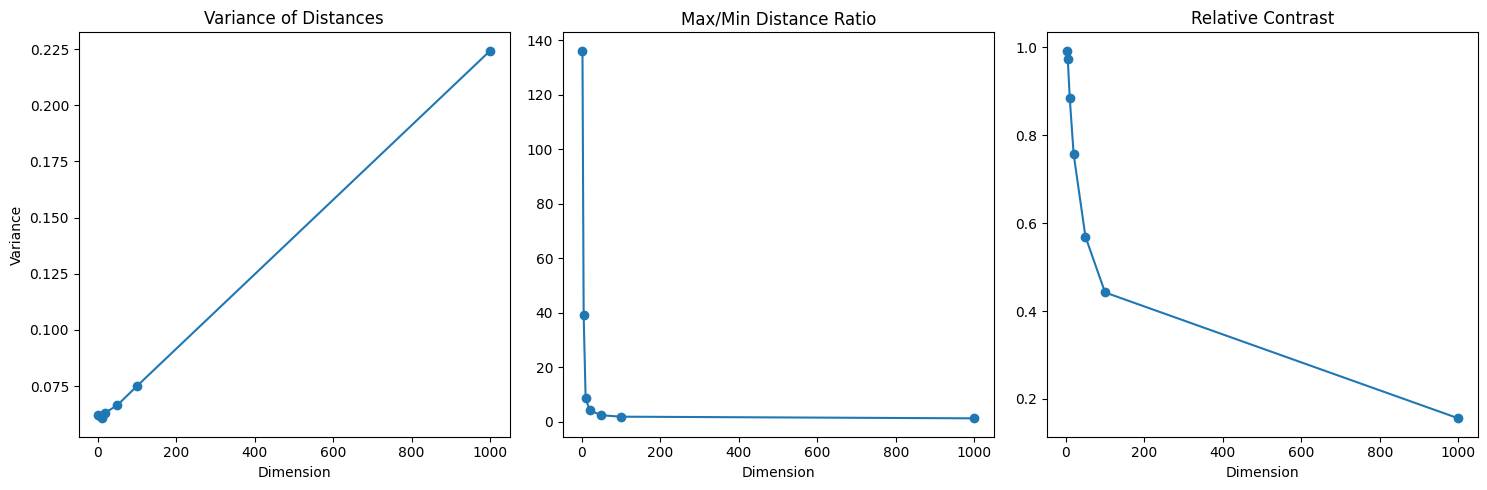

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def quantify_distance_convergence(dimensions, points=1000):
    variances = []
    max_min_ratios = []
    relative_contrasts = []

    for dim in dimensions:
        # Generate random points in the given dimension
        data = np.random.rand(points, dim)
        # Compute pairwise distances
        distances = np.sqrt(((data[:, np.newaxis, :] - data[np.newaxis, :, :]) ** 2).sum(axis=2))
        # Calculate metrics
        variance = np.var(distances)
        max_distance = np.max(distances)
        min_distance = np.min(distances[distances > 1e-2])
        max_min_ratio = max_distance / min_distance
        relative_contrast = (max_distance - min_distance) / max_distance

        print(f"Dimension: {dim}, Variance: {variance:.2f}, Max: {max_distance:.2f}, Min: {min_distance:.2f}, Ratio: {max_min_ratio:.2f}, Contrast: {relative_contrast:.2f}")

        # Store results
        variances.append(variance)
        max_min_ratios.append(max_min_ratio)
        relative_contrasts.append(relative_contrast)

    return variances, max_min_ratios, relative_contrasts

# Define dimensions to test
dimensions = [2, 5, 10, 20, 50, 100, 1000]

# Quantify distance convergence
variances, max_min_ratios, relative_contrasts = quantify_distance_convergence(dimensions)

# Plot results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(dimensions, variances, marker='o')
plt.title('Variance of Distances')
plt.xlabel('Dimension')
plt.ylabel('Variance')

plt.subplot(1, 3, 2)
plt.plot(dimensions, max_min_ratios, marker='o')
plt.title('Max/Min Distance Ratio')
plt.xlabel('Dimension')

plt.subplot(1, 3, 3)
plt.plot(dimensions, relative_contrasts, marker='o')
plt.title('Relative Contrast')
plt.xlabel('Dimension')

plt.tight_layout()
plt.show()


In practical terms, when working with data distributions, especially in low to moderate dimensions, we aim to perform several key tasks that become challenging or fail in high-dimensional settings. These tasks are foundational to exploratory data analysis, modeling, and inference, and their failure in high dimensions highlights the need for specialized approaches. Here's what we typically want to do with data distributions and why these tasks fail in high-dimensional contexts:

### 1. **Density Estimation**

- **Goal**: Estimate the underlying probability distribution of the data to understand where data points are most likely to occur.
- **Failure in High-Dim**: Due to the curse of dimensionality, data becomes sparse, making traditional density estimation methods (like histograms or kernel density estimation) ineffective. The vast number of bins or the wide bandwidth needed leads to estimations that are either too granular (mostly empty bins) or too smooth (masking underlying structures).

### 2. **Clustering and Classification**

- **Goal**: Group similar data points together (clustering) or assign labels to data points based on their features (classification).
- **Failure in High-Dim**: The convergence of distances between points makes it difficult to define what "similar" or "close" means, as all points tend to be equidistant from each other. This undermines the basis for many clustering and classification algorithms that rely on distance metrics.

### 3. **Feature Selection and Dimensionality Reduction**

- **Goal**: Identify the most informative features and reduce the dimensionality of the data to a manageable size while preserving its structure.
- **Failure in High-Dim**: While not a failure per se, the challenge lies in the difficulty of identifying which dimensions are informative. The presence of many dimensions can obscure the relevance of individual features, and naive approaches to dimensionality reduction might remove important information or fail to simplify the data meaningfully.

### 4. **Anomaly Detection**

- **Goal**: Identify data points that deviate significantly from the distribution of the rest of the data.
- **Failure in High-Dim**: With the increased sparsity of data and the uniformity of distances, distinguishing between normal variations and true anomalies becomes challenging. Anomalies may not stand out in high-dimensional space as they would in lower dimensions.

### 5. **Visualization and Interpretation**

- **Goal**: Visually explore data distributions to gain insights, identify patterns, and communicate findings.
- **Failure in High-Dim**: Direct visualization of high-dimensional data is impossible, and projections or reductions to lower dimensions can be misleading or lose critical information. This makes it hard to visually assess the distribution, identify clusters, or spot trends and outliers.

### 6. **Predictive Modeling**

- **Goal**: Build models that can predict outcomes or classify data based on its distribution.
- **Failure in High-Dim**: Models may overfit to the high-dimensional data, capturing noise rather than the underlying signal. The sparsity of data and the high dimensionality can make it difficult to train models that generalize well to unseen data.

### Addressing the Challenges

To address these challenges, data scientists employ various strategies, such as:

- **Dimensionality Reduction Techniques**: Methods like PCA (Principal Component Analysis), t-SNE, or autoencoders to reduce dimensions while preserving data structure.
- **Regularization**: Techniques in model training that penalize complexity to prevent overfitting in high dimensions.
- **Feature Selection**: Identifying and keeping only the most informative features to simplify models and improve interpretability.
- **Ensemble Methods and Advanced Machine Learning Models**: Using models that are less sensitive to the curse of dimensionality or that can implicitly perform feature selection.

In summary, while the tasks we aim to perform with data distributions are fundamental to data analysis, their traditional methodologies often falter in high-dimensional spaces. Recognizing these challenges is crucial for applying or developing methods that are robust to the complexities of high-dimensional data.